In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
sns.set()

## Import file

- longitude: A measure of how far west a house is; a higher value is farther west

- latitude: A measure of how far north a house is; a higher value is farther north

- housingMedianAge: Median age of a house within a block; a lower number is a newer building

- totalRooms: Total number of rooms within a block

- totalBedrooms: Total number of bedrooms within a block

- population: Total number of people residing within a block

- households: Total number of households, a group of people residing within a home unit, for a block

- medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

- medianHouseValue: Median house value for households within a block (measured in US Dollars)

- oceanProximity: Location of the house w.r.t ocean/sea

In [2]:
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
## Information

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


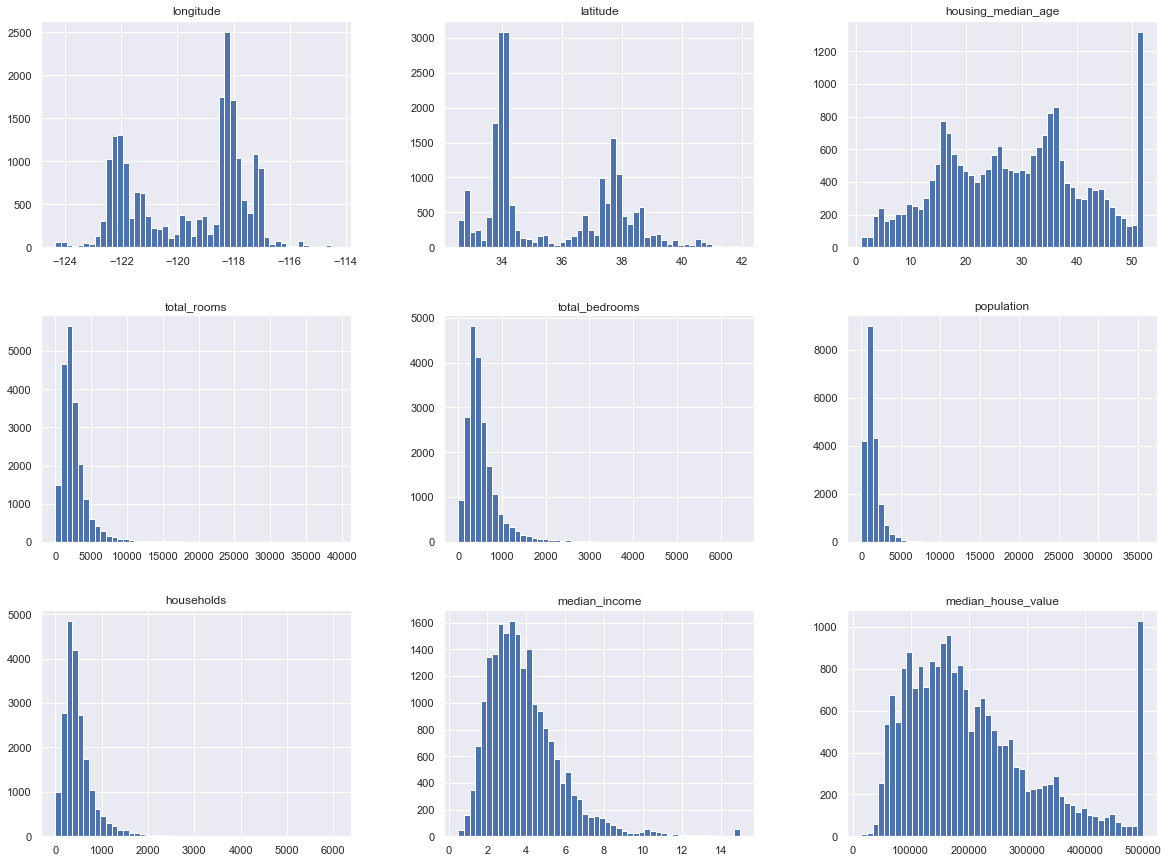

In [6]:
## Showing histogram
housing.hist(bins=50, figsize=(20,15))
plt.show()

## Lets take a look at median income categories

<AxesSubplot:>

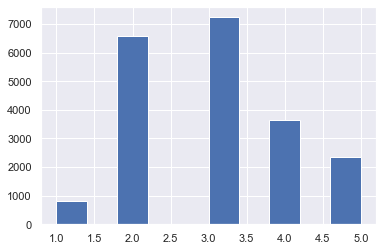

In [7]:
## The following code uses the pd.cut() function 
## to create an income category attribute with 5 categories (label from 1 to 5)
# Group1:0-1.5
# Group2:1.5-3.0
# Group3:3.0-4.5
# Group4:4.5-6.0
# Group5:6.0 or above

housing['income_cat'] = pd.cut(housing['median_income'],
                              bins = [0., 1.5, 3.0, 4.5, 6.0, np.inf],
                              labels = [1,2,3,4,5])
housing['income_cat'].hist()

## Stratified sampling based on the income categories

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1,
                              test_size=0.2,
                              random_state = 42)

In [9]:
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Text(0.5, 1.0, 'Test_set')

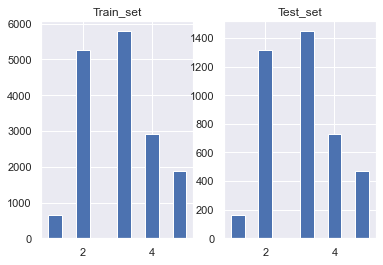

In [10]:
## It should has the same prportion in train&test set as before
plt.subplot(121)
strat_train_set['income_cat'].hist()
plt.title('Train_set')
plt.subplot(122)
strat_test_set['income_cat'].hist()
plt.title('Test_set')


#### Now we can remove the income_cat attribute so the data is back to its original state:

In [11]:
for ds in [strat_train_set, strat_test_set]:
    ds.drop('income_cat',axis=1,inplace=True)

In [12]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


## Discover and Visualize the Data to Gain Insights

In [13]:
housing = strat_train_set.copy()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

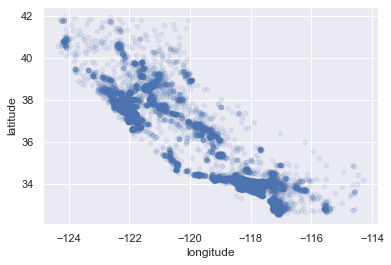

In [14]:
#Setting the alpha option to 0.1 makes it much easier to visualize the places
#where there is a high density of data points
housing.plot(kind='scatter', x= 'longitude', y = 'latitude', alpha=0.1)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

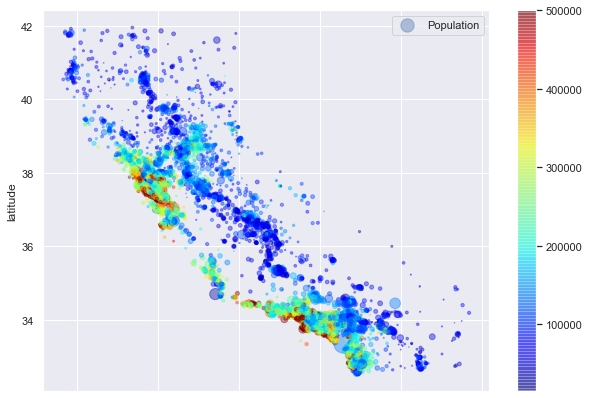

In [15]:
## We can make some color on the graph
## Filter by population and median housing value
## s = circle radius, c = color

housing.plot(kind='scatter', x='longitude', y ='latitude', alpha=0.4,
            s = housing['population']/100, label = 'Population', figsize =(10,7),
            c = housing['median_house_value'], cmap = 'jet', #cmap=color map
            colorbar= True)

### Correlation matrix

In [16]:
# Pearson's r
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [17]:
#we can use panda scatter matrix function to plot correlation
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

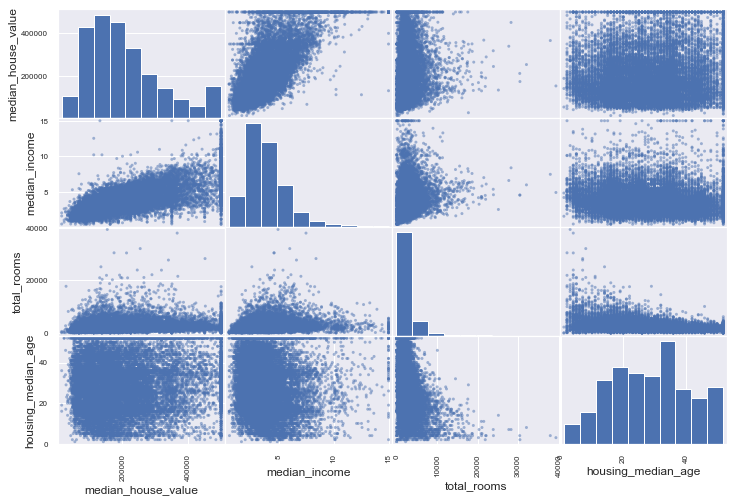

In [18]:
selected_col = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing[selected_col], figsize=(12,8))

### We can also pick the most promising one to predict median house value

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

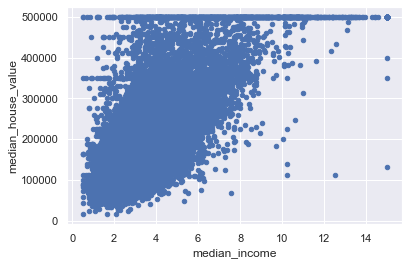

In [19]:
housing.plot(kind='scatter', x='median_income', y='median_house_value')

## Experimenting with Attribute Combinations

In [20]:
#we need to transform our data or combine it in meaningful way
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [21]:
## Look at correlation matrix again

corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

It seems that population_per_household does not have too much correlation with median_house_value


### Prepare the Data for Machine Learning Algorithms

In [22]:
## let’s revert to a clean training set
housing = strat_train_set.drop('median_house_value', axis=1)
housing_label = strat_train_set['median_house_value'].copy()

Data cleaning

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [24]:
## We need to create data without object first
house_num = housing.drop('ocean_proximity', axis=1)

# So now we can fit the imputer
imputer.fit(house_num)

SimpleImputer(strategy='median')

In [25]:
#Now we can use this “trained” imputer to transform the training set by replacing missing values by the learned medians:
X = imputer.transform(house_num)

##Put it back to DataFrame
house_num_tr = pd.DataFrame(X, columns=house_num.columns.values)

## We can check the missing value now
house_num_tr.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

### Handling Text and Categorical Attributes

In [26]:
house_cat = housing[['ocean_proximity']]  ## double [] keep it as DF

In [27]:
house_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [28]:
## One hot encode variable
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
house_cat_1hot = cat_encoder.fit_transform(house_cat)

In [29]:
house_cat_df = pd.DataFrame(house_cat_1hot.toarray(), columns=cat_encoder.get_feature_names())
house_cat_df

,x0_<1H OCEAN,x0_INLAND,x0_ISLAND,x0_NEAR BAY,x0_NEAR OCEAN
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
16507,0.0,1.0,0.0,0.0,0.0
16508,0.0,1.0,0.0,0.0,0.0
16509,0.0,1.0,0.0,0.0,0.0
16510,1.0,0.0,0.0,0.0,0.0


### def a class for adding new attribute

In [30]:
def CombinedAttributesAdder(df):
    #col = ['total_rooms','total_bedrooms', 'population']
    df['rooms_per_household'] = df['total_rooms'] / df['households']
    df['population_per_household'] = df['population'] / df['households']
    df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
    return df

In [31]:
house_num_added = CombinedAttributesAdder(house_num_tr)
house_num_added.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,4.625369,2.094395,0.223852
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,6.008850,2.707965,0.159057
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,4.225108,2.025974,0.241291
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,5.232295,4.135977,0.200866
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,4.505810,3.047847,0.231341


### Feature Scaling

If the input numerical attributes has the same scale, the algorithm will perform better

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

house_num_scaled = scaler.fit_transform(house_num_added)
house_num_scaled = pd.DataFrame(house_num_scaled, columns=house_num_added.columns.values)
house_num_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.312055,-0.086499,0.155318
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.033534,-0.836289
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.465315,-0.092405,0.422200
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.079661,0.089736,-0.196453
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.357834,-0.004194,0.269928
...,...,...,...,...,...,...,...,...,...,...,...
16507,0.722267,-0.673331,1.379547,-0.632123,-0.725361,-0.759010,-0.764049,0.554158,0.234352,-0.031755,-0.428853
16508,1.007011,-0.823004,0.902385,-0.667196,-0.584183,-0.329664,-0.636291,-0.948815,-0.308114,0.084689,0.491503
16509,1.586489,-0.724781,-1.562952,1.043901,0.822735,0.607904,0.713156,-0.316705,0.346934,-0.030554,-0.521776
16510,0.782213,-0.851068,0.186642,-0.309919,-0.374849,-0.057178,-0.375451,0.098121,0.024995,0.061509,-0.303407


In [33]:
## Now combining both dataframe together
housing_input = pd.concat([house_num_scaled,house_cat_df],axis=1)
housing_input

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,x0_<1H OCEAN,x0_INLAND,x0_ISLAND,x0_NEAR BAY,x0_NEAR OCEAN
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.312055,-0.086499,0.155318,1.0,0.0,0.0,0.0,0.0
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.033534,-0.836289,1.0,0.0,0.0,0.0,0.0
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.465315,-0.092405,0.422200,0.0,0.0,0.0,0.0,1.0
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.079661,0.089736,-0.196453,0.0,1.0,0.0,0.0,0.0
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.357834,-0.004194,0.269928,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.722267,-0.673331,1.379547,-0.632123,-0.725361,-0.759010,-0.764049,0.554158,0.234352,-0.031755,-0.428853,0.0,1.0,0.0,0.0,0.0
16508,1.007011,-0.823004,0.902385,-0.667196,-0.584183,-0.329664,-0.636291,-0.948815,-0.308114,0.084689,0.491503,0.0,1.0,0.0,0.0,0.0
16509,1.586489,-0.724781,-1.562952,1.043901,0.822735,0.607904,0.713156,-0.316705,0.346934,-0.030554,-0.521776,0.0,1.0,0.0,0.0,0.0
16510,0.782213,-0.851068,0.186642,-0.309919,-0.374849,-0.057178,-0.375451,0.098121,0.024995,0.061509,-0.303407,1.0,0.0,0.0,0.0,0.0


## Build a simple linear regression model and evaluate  on the training set

In [34]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_input, housing_label)

LinearRegression()

In [35]:
some_data = housing_input[:5]
some_data_label =housing_label[:5]

In [47]:
pred_some_data = lin_reg.predict(some_data)
print('Label \t   Predict      Difference')
for label,pred in zip(some_data_label.values, pred_some_data):
    print("{:<10} {:<12} {:>10}".format(label,round(pred,2),round(pred-label,2)))

Label 	   Predict      Difference
286600.0   210644.6       -75955.4
340600.0   317768.81     -22831.19
196900.0   210956.43      14056.43
46300.0    59218.99       12918.99
254500.0   189747.56     -64752.44


In [46]:
## Access the MSE
from sklearn.metrics import mean_squared_error

prediction = lin_reg.predict(housing_input)

lin_mse = mean_squared_error(housing_label,prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

## Random forest regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
rnf_reg = RandomForestRegressor(n_estimators=300, n_jobs=-1, min_samples_split=5)
rnf_reg.fit(housing_input, housing_label)

RandomForestRegressor(min_samples_split=5, n_estimators=300, n_jobs=-1)

In [54]:
## Lets do prediction on some data
some_data = housing_input[:5]
some_data_label =housing_label[:5]

pred_some_data = rnf_reg.predict(some_data)
print('Label \t   Predict      Difference')
for label,pred in zip(some_data_label.values, pred_some_data):
    print("{:<10} {:<12} {:>10}".format(label,round(pred,2),round(pred-label,2)))

Label 	   Predict      Difference
286600.0   267719.37     -18880.63
340600.0   327230.94     -13369.06
196900.0   226147.02      29247.02
46300.0    50336.09        4036.09
254500.0   228112.44     -26387.56


In [56]:
## Access the MSE
prediction = rnf_reg.predict(housing_input)

rnf_mse = mean_squared_error(housing_label,prediction)
rnf_rmse = np.sqrt(lin_mse)
rnf_rmse

21869.089309211387

In [60]:
## We can also take a look at R_square on the model
from sklearn.metrics import r2_score

rnf_r2 = r2_score(housing_label,prediction)
print(rnf_r2)

0.9642728520722395


Using random forest reduced the RMSE significantly
<br> However, we are still looking at the training set, random forest is easily overfit the train set

In [120]:
## We can also look at the feature importances, 
## which provides information about which feature contributed the most effects on prediction
importances = rnf_reg.feature_importances_
row_name = housing_input.columns.values

df_importance = pd.DataFrame()
df_importance['Features'] = row_name
df_importance['Importances(%)'] = (importances*100).round(2)
df_importance = df_importance.sort_values(by=['Importances(%)'],ascending=False).reset_index(drop=True)
df_importance

,Features,Importances(%)
0,median_income,48.00
1,x0_INLAND,14.30
2,population_per_household,12.28
3,longitude,5.77
4,latitude,5.51
5,housing_median_age,4.46
6,rooms_per_household,2.63
7,bedrooms_per_room,2.20
8,total_rooms,1.21
9,total_bedrooms,1.11


## Evaluating on test set

In [ ]:
strat_test_set

In [129]:
def transform_testset(df):
    test_input = df.drop(['median_house_value'],axis=1)
    test_label = df['median_house_value']
    
    #Handling numerical values
    test_input_num =test_input.drop(['ocean_proximity'],axis=1)
    X= imputer.transform(test_input_num)
    X= pd.DataFrame(X, columns=test_input_num.columns.values)
    X= CombinedAttributesAdder(X)
    scaled = scaler.transform(X)
    scaled_df = pd.DataFrame(scaled, columns=X.columns.values)
    
    #Handling categorical values
    test_input_cat = test_input[['ocean_proximity']]
    cat = cat_encoder.transform(test_input_cat)
    cat_df = pd.DataFrame(cat.toarray(), columns=cat_encoder.get_feature_names())
    
    #Combine both num and cat variable
    comb = pd.concat([scaled_df,cat_df],axis=1)
    
    return comb, test_label

In [130]:
test_input,test_label = transform_testset(strat_test_set)

In [134]:
##RMSE
test_prediction = rnf_reg.predict(test_input)
test_mse = mean_squared_error(test_label,test_prediction)
test_mse = np.sqrt(test_mse)
print('RMSE:', test_mse)

##R_square
test_r2 = r2_score(test_label,test_prediction)
print('R2:', test_r2)

RMSE: 48193.66977776206
R2: 0.8217699860605506
